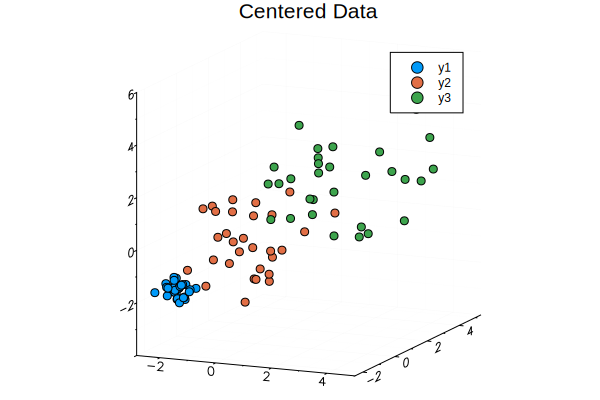

In [1]:
# The pre-processing process is exactly the same as that in PAC, so direclty skip the redundant codes.
include("utils.jl")
Random.seed!(1234)

# Generate random input data.
class_num = 3
sample_per_class = 30
data = genData(sample_per_class, [-1.5, 0., 2.], [0.25, 1., 1.3])

# Preprocess: center the raw input data.
c, global_mean = centered(data)
plotData(c, class_num, sample_per_class, "Centered Data")

In [2]:
# Scatter matrix of between-class measurement.
Sb = zeros(class_num, class_num)
# Scatter matrix of within-class measurement.
Sw = zeros(class_num, class_num)

start = 1
scale = 1 / sample_per_class
for pos in sample_per_class : sample_per_class : sample_per_class * class_num
    class_mean = mean(data[start : pos, :], dims=1)
    t = class_mean .- global_mean
    Sb += t' * t
    
    for d in data[start : pos, :]
      t = d .- class_mean
      Sw += (t' * t) .* scale
    end
    start = pos + 1
end

using LinearAlgebra
@show rank(Sb)
@show rank(Sw);

rank(Sb) = 2
rank(Sw) = 3


In [3]:
F = eigen(inv(Sw) * Sb)

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
eigenvalues:
3-element Array{Float64,1}:
  0.9192622374763791   
  0.27337404436118856  
 -8.023097842122669e-16
eigenvectors:
3×3 Array{Float64,2}:
 -0.673986  -0.0306047  -0.526642
  0.662938   0.730095   -0.226509
 -0.32597   -0.68266     0.819355

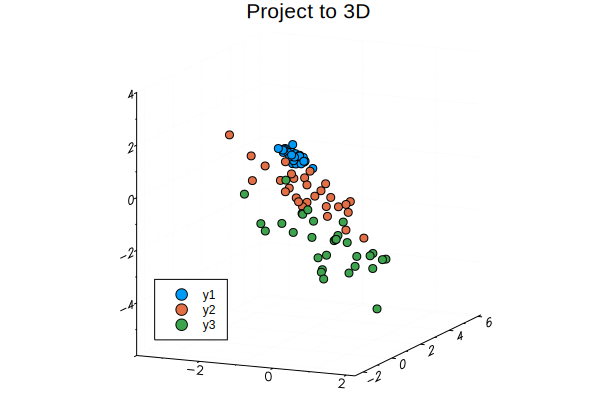

In [4]:
sorted_idx = sort(hcat(F.values, 1:length(F.values)), dims=1, by=x -> x[1], rev=true)[:,2]

# project to 2D
w2 = [F.vectors[Int(sorted_idx[1]), :]'; F.vectors[Int(sorted_idx[2]), :]']
# project to PCA components
w3 = [F.vectors[Int(sorted_idx[1]), :]'; F.vectors[Int(sorted_idx[2]), :]'; F.vectors[Int(sorted_idx[3]), :]']

projected2D = []
projected3D = []
start = 1
for pos in sample_per_class : sample_per_class : sample_per_class * class_num
    push!(projected2D, data[start:pos, :] * w2')
    push!(projected3D, data[start:pos, :] * w3')
    start = pos + 1
end

gr()
s1 = scatter(projected2D[1][:, 1], projected2D[1][:, 2])
s2 = scatter!(projected2D[2][:, 1], projected2D[2][:, 2])
s3 = scatter!(projected2D[3][:, 1], projected2D[3][:, 2])
plot!(legend=:bottomleft)
title!("Project to 2D")

s1 = scatter(projected3D[1][:, 1], projected3D[1][:, 2], projected3D[1][:, 3])
s2 = scatter!(projected3D[2][:, 1], projected3D[2][:, 2], projected3D[2][:, 3])
s3 = scatter!(projected3D[3][:, 1], projected3D[3][:, 2], projected3D[3][:, 3])
plot!(legend=:bottomleft)

title!("Project to 3D")